# LAB - Linear Regression

 - X-y split (y is the target variable, in this case, "total claim amount")

 - Train-test split.

 - Standardize the data (after the data split!).

 - Apply linear regression.

 - Model Interpretation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("file:///Users/brunasantos/Documents/GitHub/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [5]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [6]:
numerical_df 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [7]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [8]:
X = df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
y = df['total_claim_amount']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
10237,8663,42169,83,18,90,1,2
2689,4213,12160,109,5,34,0,1
4489,2359,19864,63,22,96,0,1
10401,19511,40625,70,28,26,0,2
749,3576,24959,89,19,13,0,1
...,...,...,...,...,...,...,...
5734,7610,98701,94,22,66,0,3
5191,35186,86134,98,17,78,0,2
5390,4241,19834,64,26,8,4,8
860,12941,77060,106,23,90,0,2


In [12]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
3487,4871,72648,61,0,78,0,5
668,9233,42600,115,10,78,0,3
10315,3203,68370,80,0,45,0,1
5332,5067,61067,64,20,0,1,3
1523,8427,46503,215,4,21,1,1
...,...,...,...,...,...,...,...
5928,4110,31842,108,7,31,0,1
3706,5380,55350,67,0,13,0,9
7735,2659,21297,71,26,56,0,1
9320,4674,35830,118,4,50,1,1


In [13]:
y_train

10237    398
2689     489
4489     352
10401    491
749      640
        ... 
5734      79
5191       3
5390     460
860      468
7270     925
Name: total_claim_amount, Length: 7482, dtype: int64

In [14]:
y_test

3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
5928      406
3706      321
7735       45
9320      597
7924       48
Name: total_claim_amount, Length: 3207, dtype: int64

In [18]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression ()
model = lm.fit(X_train_scaled,y_train)

In [22]:
model.coef_

array([ -6.04221236, -34.35264853, 187.28585793,   1.60473817,
        -3.61151009,   1.54162247,   3.30263844])

In [23]:
model.intercept_

433.3067361668003

In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
y_test - y_pred

3487    -107.773252
668      102.488734
10315    -93.044844
5332    -186.175231
1523     -68.794972
            ...    
5928    -135.829678
3706      23.165406
7735    -311.745062
9320       8.179901
7924    -182.304026
Name: total_claim_amount, Length: 3207, dtype: float64

In [26]:
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [27]:
compare

,y_test,y_pred
0,120,227.773252
1,660,557.511266
2,244,337.044844
3,86,272.175231
4,1032,1100.794972
...,...,...
3202,406,541.829678
3203,321,297.834594
3204,45,356.745062
3205,597,588.820099


In [33]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [34]:
mse(y_test,y_pred)

49154.64390326823

In [35]:
mae(y_test,y_pred)

152.83216224246735

In [37]:
import matplotlib.pyplot as plt

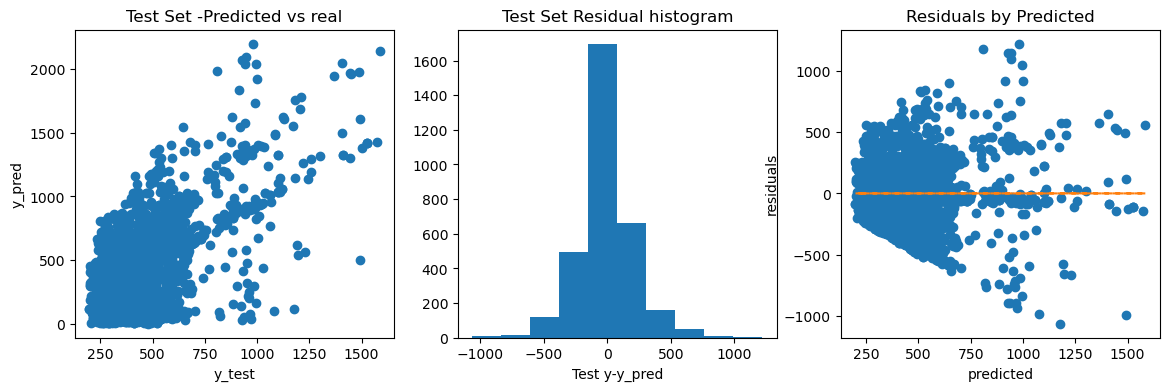

In [38]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")
# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")
ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')